In [1]:
import torch
import glob
import os
import cv2
import matplotlib.pyplot as plt
import random

from torchvision import transforms

In [6]:
train_image_path = os.path.join(
    '..', 
    'input', 
    'plantvillage dataset', 
    'color'
)
all_image_paths = glob.glob(train_image_path+'/*/*', recursive=True)

In [7]:
print(all_image_paths[:5])

['..\\input\\plantvillage dataset\\color\\Apple___Apple_scab\\00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG', '..\\input\\plantvillage dataset\\color\\Apple___Apple_scab\\01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG', '..\\input\\plantvillage dataset\\color\\Apple___Apple_scab\\01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112.JPG', '..\\input\\plantvillage dataset\\color\\Apple___Apple_scab\\0208f4eb-45a4-4399-904e-989ac2c6257c___FREC_Scab 3037.JPG', '..\\input\\plantvillage dataset\\color\\Apple___Apple_scab\\023123cb-7b69-4c9f-a521-766d7c8543bb___FREC_Scab 3487.JPG']


In [8]:
train_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(35),
    transforms.ColorJitter(brightness=0.4,
                           contrast=0.4,
                           saturation=0.4,
                           hue=0),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.5, 1.5)),
    transforms.RandomAdjustSharpness(sharpness_factor=2, p=0.5),
])

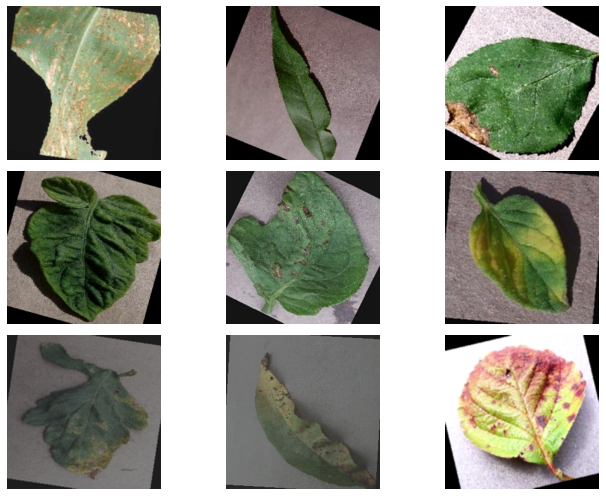

In [9]:
plt.figure(figsize=(10, 7))
for i, image_path in enumerate(all_image_paths):
    if i == 9:
        break
    image_index = random.randint(0, len(all_image_paths))
    image = cv2.imread(all_image_paths[image_index])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    tranformed_image = train_transform(image)
    plt.subplot(3, 3, i+1)
    plt.imshow(tranformed_image)
    plt.axis('off')
plt.tight_layout()
plt.show()